In [89]:
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd

In [90]:
df = pd.read_csv("modified_data1.csv") 
df1 = df

In [91]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8046 entries, 0 to 8045
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   status      8046 non-null   object 
 1   bed         8046 non-null   int64  
 2   bath        8046 non-null   int64  
 3   acre_lot    8046 non-null   float64
 4   city        8046 non-null   object 
 5   state       8046 non-null   object 
 6   zip_code    8046 non-null   int64  
 7   house_size  8046 non-null   int64  
 8   price       8046 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 565.9+ KB


Figure(1000x400)


<Axes: xlabel='bed'>

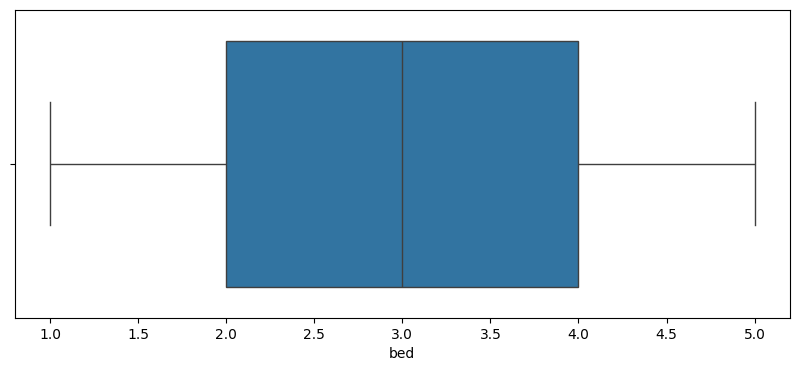

In [92]:
print(plt.figure(figsize = (10, 4), dpi = 100)) 
sns.boxplot(x = "bed", data = df1) 

Figure(1000x400)


<Axes: xlabel='house_size'>

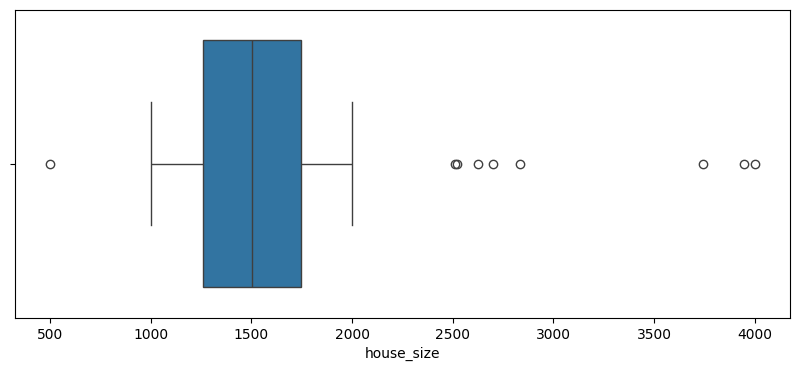

In [93]:
print(plt.figure(figsize = (10, 4), dpi = 100)) 
sns.boxplot(x = "house_size", data = df1) 

In [94]:
percentile25 = df1['house_size'].quantile(0.25)
percentile75 = df1['house_size'].quantile(0.75)
iqr = percentile75 - percentile25

In [95]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [96]:
df1[df1['house_size'] > upper_limit]
df1[df1['house_size'] < lower_limit]

,status,bed,bath,acre_lot,city,state,zip_code,house_size,price
161,sold,1,2,0.3,Lanesborough,Massachusetts,1237,500,200000


In [1]:
new_df = df1[df1['house_size'] < upper_limit]
new_df.shape

NameError: name 'df1' is not defined

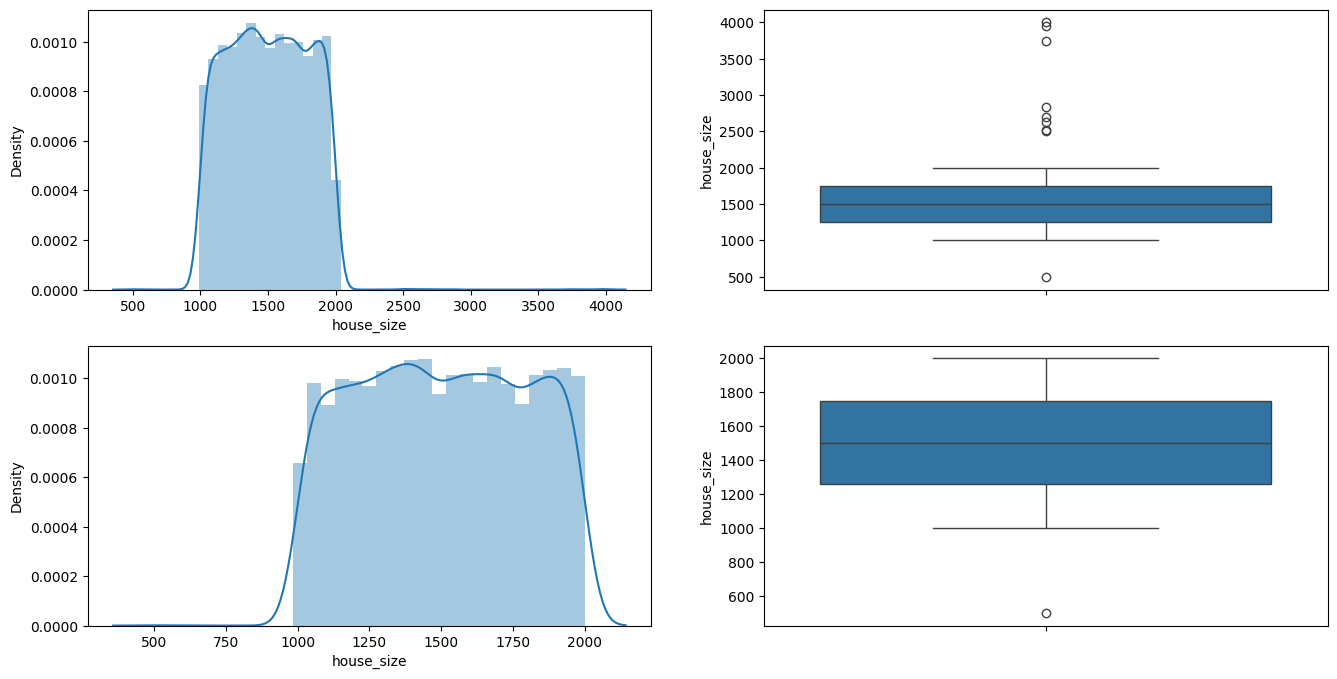

In [98]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df1['house_size'])
plt.subplot(2,2,2)
sns.boxplot(df1['house_size'])
plt.subplot(2,2,3)
sns.distplot(new_df['house_size'])
plt.subplot(2,2,4)
sns.boxplot(new_df['house_size'])
plt.show()

In [99]:
pip install warnings

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


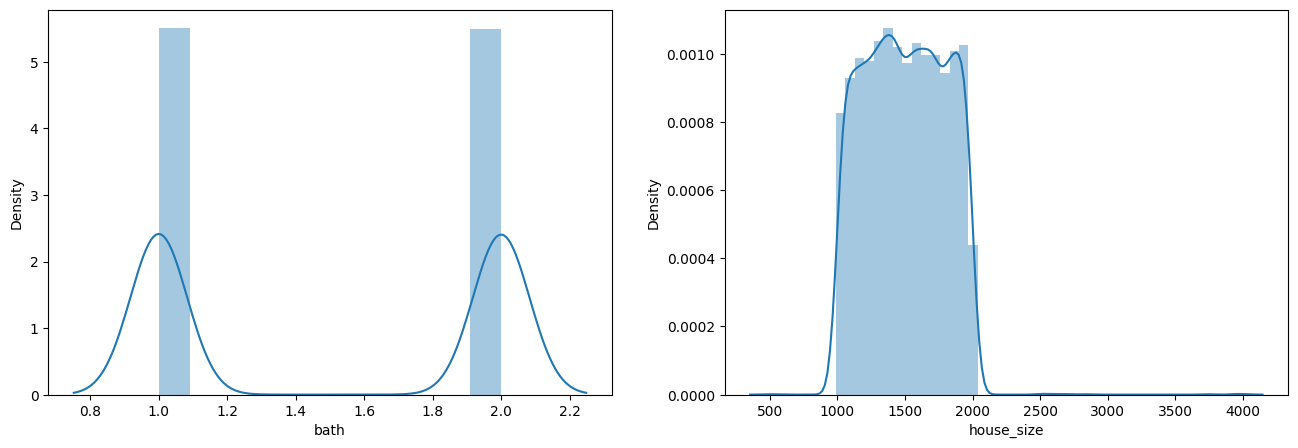

In [100]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df1['bath'])
plt.subplot(1,2,2)
sns.distplot(df1['house_size'])
plt.show()

In [101]:
# finding boundary values for bmi using z-score
print("Highest allowed",df1['house_size'].mean() + 3*df1['house_size'].std())
print("Lowest allowed",df1['house_size'].mean() - 3*df1['house_size'].std())

Highest allowed 2380.3979033681126
Lowest allowed 626.6520593462794


In [102]:
df1[(df1['house_size'] > 2379.9) | (df1['house_size'] <  627.1)]

,status,bed,bath,acre_lot,city,state,zip_code,house_size,price
161,sold,1,2,0.30,Lanesborough,Massachusetts,1237,500,200000
1785,sold,4,2,1.53,Fryeburg,Maine,4037,2623,359900
4639,for_sale,5,1,0.14,Woonsocket,Rhode Island,2895,2835,389900
4736,for_sale,3,1,0.30,Cranston,Rhode Island,2921,3742,569000
5834,sold,5,1,87.50,Woodbury,Connecticut,6798,2700,999000
6062,sold,1,2,0.92,Goshen,Connecticut,6756,2523,185000
6752,for_sale,4,2,0.59,Suffield,Connecticut,6078,3999,489900
7173,sold,3,2,0.23,Newington,Connecticut,6111,2509,320000
7812,for_sale,3,2,1.60,South Windsor,Connecticut,6074,3946,225000


In [103]:
# Trimming of outliers for bmi
new_df1 = df1[(df1['house_size'] < 2379.9) & (df1['house_size'] >  627.1)] 
new_df1

,status,bed,bath,acre_lot,city,state,zip_code,house_size,price
0,for_sale,1,1,20.20,Wilbraham,Massachusetts,1095,1751,299000
1,sold,1,2,0.28,Agawam,Massachusetts,1030,1060,300000
2,for_sale,4,2,0.16,Springfield,Massachusetts,1105,1402,199900
3,for_sale,5,1,0.13,Holyoke,Massachusetts,1040,1327,300000
4,for_sale,3,1,0.13,West Springfield,Massachusetts,1089,1715,299000
...,...,...,...,...,...,...,...,...,...
8041,for_sale,2,1,0.20,East Hartford,Connecticut,6118,1893,190000
8042,sold,4,2,0.42,Enfield,Connecticut,6082,1413,269900
8043,for_sale,5,1,0.98,Somers,Connecticut,6071,1520,349900
8044,for_sale,2,2,2.07,Haddam,Connecticut,6438,1726,799000


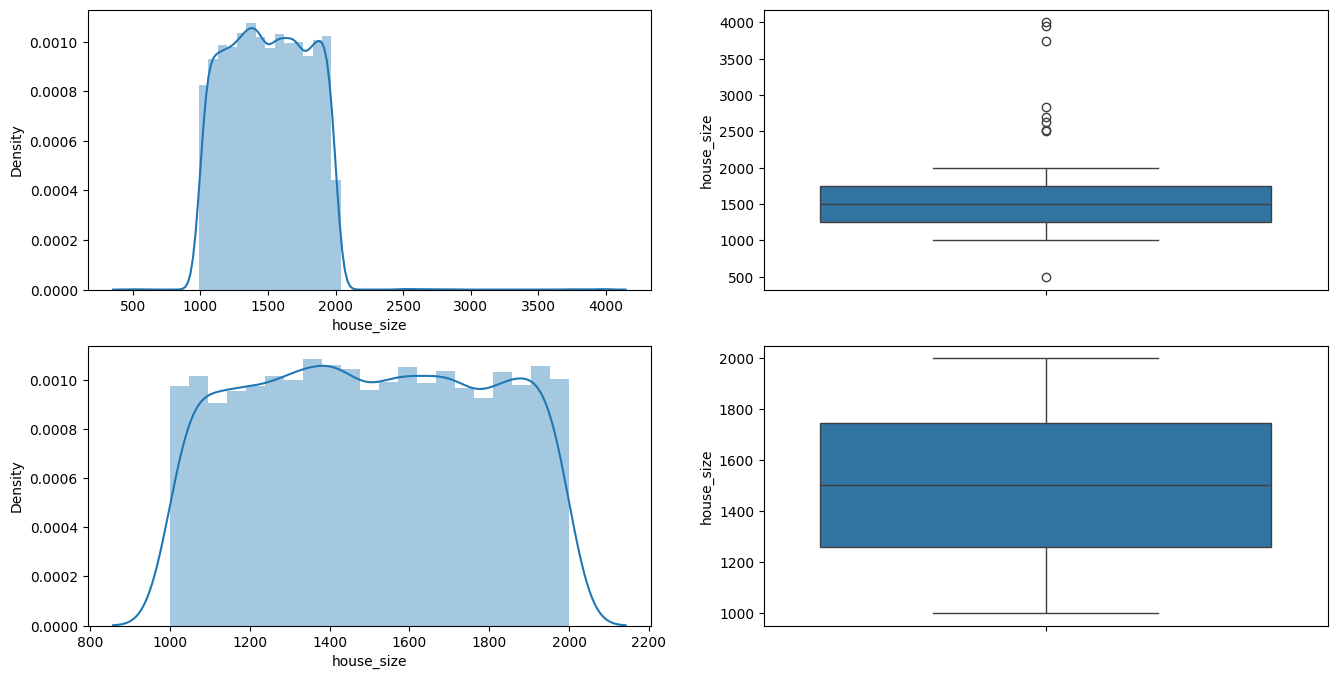

In [104]:
# compare plots after trimming
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df1['house_size'])
plt.subplot(2,2,2)
sns.boxplot(df1['house_size'])
plt.subplot(2,2,3)
sns.distplot(new_df1['house_size'])
plt.subplot(2,2,4)
sns.boxplot(new_df1['house_size'])
plt.show()